In [1]:
!pip install pandas seaborn scikit-learn

In [2]:
print('https://drive.google.com/drive/folders/1ljFuvBm5mBzsMhgQQNGy_6StjWi7nr_V?usp=sharing')

https://drive.google.com/drive/folders/1ljFuvBm5mBzsMhgQQNGy_6StjWi7nr_V?usp=sharing


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the dataset (upload train.csv to Colab or mount Google Drive if it's there)
from google.colab import files
uploaded = files.upload()

# Assuming the file is named 'train.csv'
df = pd.read_csv('train.csv')

# Display first few rows of the dataset
df.head()


Saving train.csv to train.csv


,CustomerID,State,Customer Lifetime Value,Response,Coverage,Coverage Index,Education,Education Index,Effective To Date,Employment Status,...,Policy Type,Policy Type Index,Policy,Policy Index,Renew Offer Type,Sales Channel,Sales Channel Index,Vehicle Size,Vehicle Size Index,Claim over 1k
0,QC35222,California,3622.69,No,Basic,0,Bachelor,2,1/1/2024,Employed,...,Corporate Auto,1,Corporate L2,4,3,Web,0,Medsize,1,0
1,AE98193,Washington,10610.21,No,Basic,0,High School or Below,0,1/1/2024,Unemployed,...,Personal Auto,0,Personal L1,0,1,Branch,1,Medsize,1,1
2,TM23514,Oregon,13868.02,No,Extended,1,College,1,1/1/2024,Employed,...,Personal Auto,0,Personal L3,2,3,Web,0,Medsize,1,0
3,QZ42725,Washington,3119.69,No,Basic,0,Bachelor,2,1/1/2024,Unemployed,...,Personal Auto,0,Personal L3,2,2,Agent,2,Medsize,1,0
4,SG81493,Arizona,5999.04,No,Premium,2,Bachelor,2,1/1/2024,Employed,...,Corporate Auto,1,Corporate L1,3,2,Web,0,Medsize,1,0


In [4]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Basic statistics
print(df.describe())

# Check unique values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print()


CustomerID                       0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Coverage Index                   0
Education                        0
Education Index                  0
Effective To Date                0
Employment Status                0
Employment Status Index          0
Gender                           0
Income                           0
Marital Status                   0
Marital Status Index             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy Type Index                0
Policy                           0
Policy Index                     0
Renew Offer Type                 0
Sales Channel                    0
Sales Channel Index              0
Vehicle Size                     0
Vehicle Size Index               0
Claim over 1k       

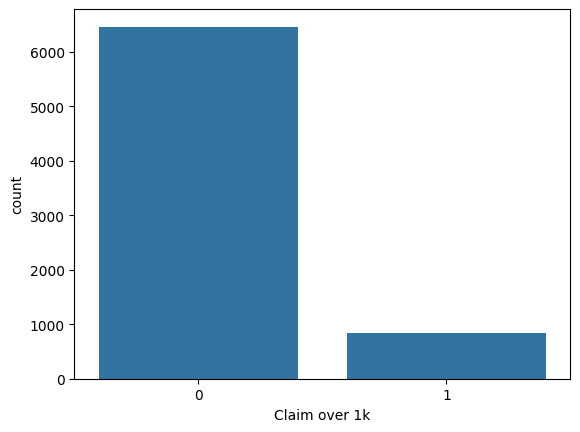

In [5]:
# Count plot of the target variable
sns.countplot(x='Claim over 1k', data=df)
plt.show()

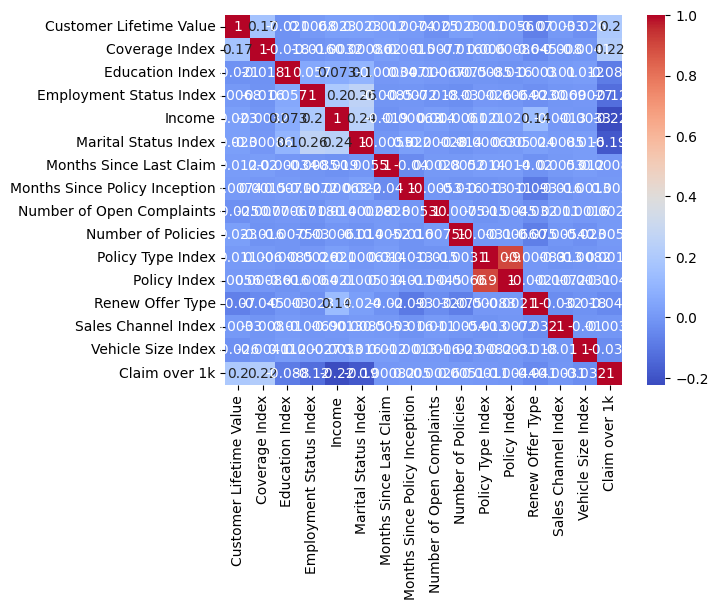

In [6]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Visualize correlation for numerical variables
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

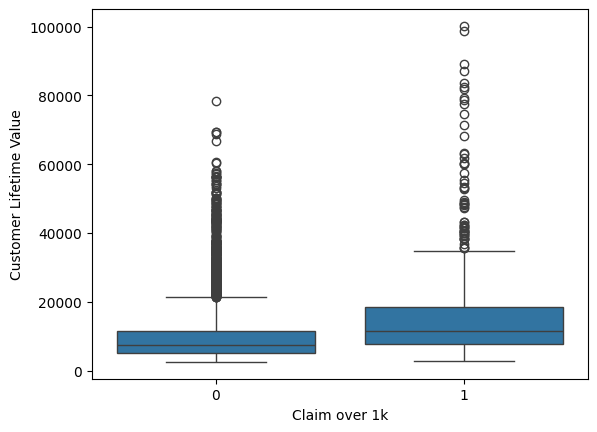

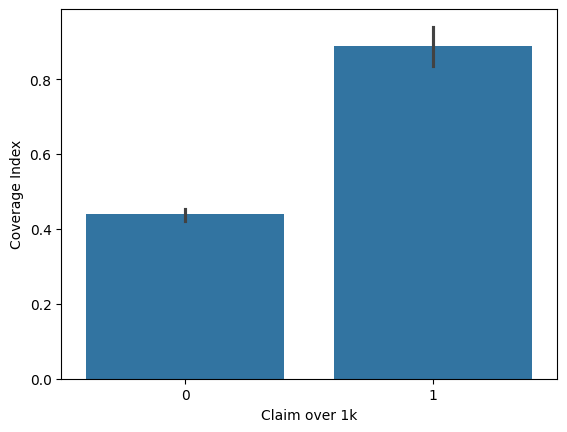

In [7]:
# Visualize relationships for some key features
sns.boxplot(x='Claim over 1k', y='Customer Lifetime Value', data=df)
plt.show()

sns.barplot(x='Claim over 1k', y='Coverage Index', data=df)
plt.show()

In [8]:
# Convert categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define the features and target
X = df_encoded.drop(['Claim over 1k'], axis=1)
y = df_encoded['Claim over 1k']


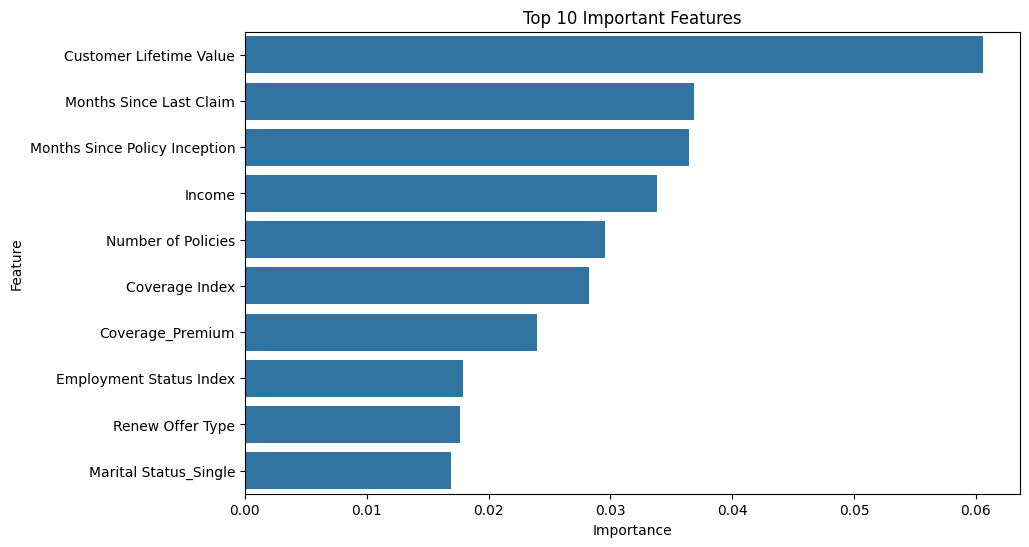

In [9]:
# Train a Random Forest Classifier on the entire train.csv data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()

In [18]:
X = df_encoded[['Customer Lifetime Value','Months Since Last Claim', 'Months Since Policy Inception', 'Income', 'Number of Policies',
                'Coverage Index', 'Coverage_Premium', 'Employment Status Index', 'Renew Offer Type', 'Marital Status_Single']]
y = df_encoded['Claim over 1k']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
dt_model = DecisionTreeClassifier(max_depth=7, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

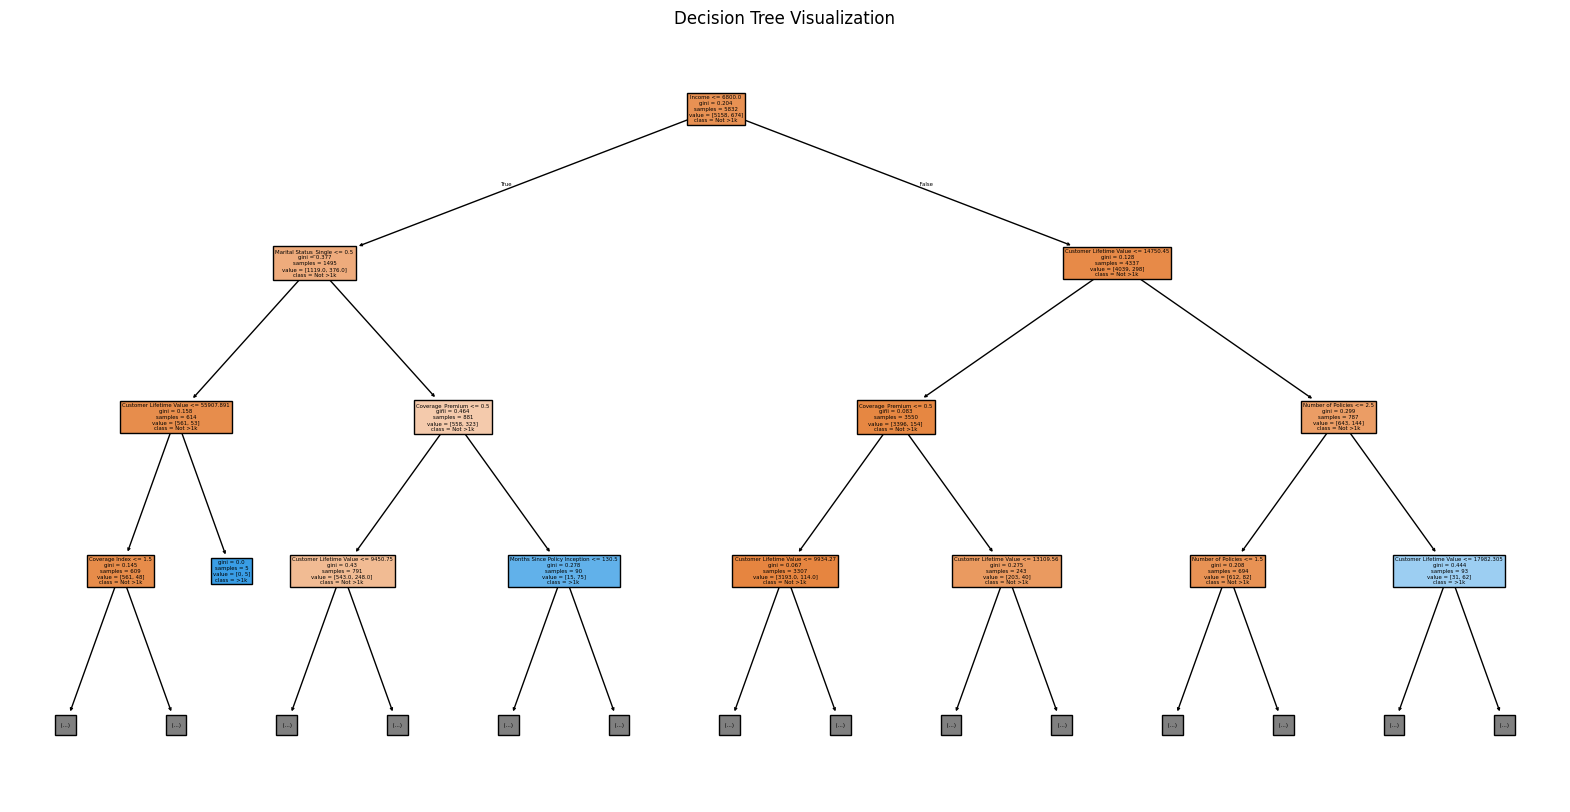

In [56]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not >1k', '>1k'], filled=True, max_depth=3)
plt.title('Decision Tree Visualization')
plt.show()

In [57]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=["Not >1k", ">1k"])

In [58]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[1282   18]
 [  92   66]]

Classification Report:
              precision    recall  f1-score   support

     Not >1k       0.93      0.99      0.96      1300
         >1k       0.79      0.42      0.55       158

    accuracy                           0.92      1458
   macro avg       0.86      0.70      0.75      1458
weighted avg       0.92      0.92      0.91      1458



In [74]:
test_df = pd.read_csv('test.csv')

In [76]:
test_df_encoded = pd.get_dummies(test_df, drop_first=True)

In [77]:
test_x = test_df_encoded[['Customer Lifetime Value','Months Since Last Claim', 'Months Since Policy Inception', 'Income', 'Number of Policies',
                'Coverage Index', 'Coverage_Premium', 'Employment Status Index', 'Renew Offer Type', 'Marital Status_Single']]

In [78]:
y_pred = dt_model.predict(test_x)

In [79]:
customer_ids = test_df.loc[test_df.index, 'CustomerID']
results_df = pd.DataFrame({
    'CustomerID': customer_ids,
    'Predicted_Claim_Over_1k': y_pred
})
results_df

,CustomerID,Predicted_Claim_Over_1k
0,WB38524,0
1,QP80741,0
2,WP41146,0
3,KR62797,0
4,VE55982,0
...,...,...
1839,DK92504,1
1840,YD28431,0
1841,EZ43738,0
1842,PJ36160,0
